In [1]:
import model
import numpy as np
import random
from utils import simple_graph
import tank
import truck


import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML

In [2]:

def initialize_system():
    # Tanks' information
    global n
    n=5
    tank_ids = list(range(1,n+1))
    tank_max_loads =  np.array([100., 100., 200., 300., 400.])
    tank_current_loads =  np.array([50., 60., 120., 150., 300.])
    tank_consumption_rates =  np.array([10.] * n)
    
    global n_discrete_load_levels
    n_discrete_load_levels = np.array([5,5,10,10,10])

    # Trucks' information
    global k
    k=2
    truck_ids = list(range(k))
    truck_max_loads = np.array([20., 50.])
    truck_current_loads = truck_max_loads.copy()
    truck_current_positions =  np.array([0] * k)
    #truck_fractions_deliverable =  np.array([1.] * k) # we for now we only allow to deliver all the content of the truck
    truck_fractions_deliverable =  np.array([ np.array([0.5, 1.]), 
                                              np.array([0.5, 1.])
                                            ]) # we for now we only allow to deliver all the content of the truck
    global n_discrete_load_levels_trucks
    n_discrete_load_levels_trucks = np.array([2,2])

    # System's information
    def simple_graph(n: int):    
        A = np.zeros((n,n))
        A[0,0:n] = 1
        A = A.astype(int)
        return(A)

    graph = simple_graph(n+1)
    tanks = [tank.Tank( tank_id, current_load, max_load, consumption_rate, n_lvls) 
             for  tank_id, current_load, max_load, consumption_rate, n_lvls in 
             zip( tank_ids, tank_current_loads, tank_max_loads, tank_consumption_rates, n_discrete_load_levels)]
    trucks = [truck.Truck( truck_id, current_load, max_load, current_position, load_fractions_deliverable, n_lvls) 
             for  truck_id, current_load, max_load, current_position, load_fractions_deliverable, n_lvls in 
             zip(truck_ids, truck_current_loads, truck_max_loads, truck_current_positions, 
                 truck_fractions_deliverable, n_discrete_load_levels_trucks)]

    def simple_weights(n: int, w: float):    
        W = np.full((n,n), np.inf)
        W[0,:] = w
        return(W)
    w =  np.array([0, 20., 10., 30., 50.5, 45.])

    weights_matrix = simple_weights(n+1, w)
    
    return(tanks, trucks, graph, weights_matrix)




In [3]:
tanks, trucks, graph, weights_matrix = initialize_system()
toy_system = model.System(tanks = tanks, trucks = trucks, adjacency_matrix = graph, weights_matrix = weights_matrix)

self.trucks [<truck.Truck object at 0x7fac343e8978>, <truck.Truck object at 0x7fac343e89e8>]
Final rewards:  -55.0
self.trucks [<truck.Truck object at 0x7fac343e8978>, <truck.Truck object at 0x7fac343e89e8>]
Final rewards:  -65.0
self.trucks [<truck.Truck object at 0x7fac343e8978>, <truck.Truck object at 0x7fac343e89e8>]
Final rewards:  -161.0
self.trucks [<truck.Truck object at 0x7fac343e8978>, <truck.Truck object at 0x7fac343e89e8>]
Final rewards:  -120.5
self.trucks [<truck.Truck object at 0x7fac343e8978>, <truck.Truck object at 0x7fac343e89e8>]
Final rewards:  -85.5
self.trucks [<truck.Truck object at 0x7fac343e8978>, <truck.Truck object at 0x7fac343e89e8>]
Final rewards:  -100.0
self.trucks [<truck.Truck object at 0x7fac343e8978>, <truck.Truck object at 0x7fac343e89e8>]
Final rewards:  -90.0
self.trucks [<truck.Truck object at 0x7fac343e8978>, <truck.Truck object at 0x7fac343e89e8>]
Final rewards:  -90.0
self.trucks [<truck.Truck object at 0x7fac343e8978>, <truck.Truck object at 0

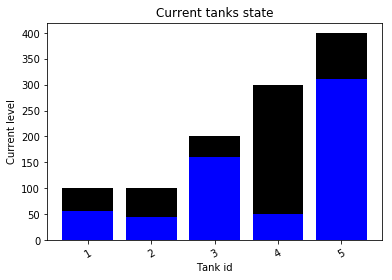

In [4]:
# Simulation
%matplotlib inline

seed = None 

iterations = 50
visualization_steps = []
rewards_list = []

for it in range(iterations):
    rewards = toy_system.random_action(seed);
    rewards_list.append(rewards)
    #print(toy_system.state())
    print("Final rewards: ", rewards);
    toy_system.reset_trucks_positions();
    visualization_steps.append(toy_system.visualize());

In [5]:
visualization_steps[0][2]

[65.0, 60.0, 110.0, 140.0, 290.0]

In [6]:
visualization_steps[0][0]+1

array([1, 2, 3, 4, 5])

In [7]:
visualization_steps;

In [8]:
def create_system_animation(visualization_steps, n_iterations, skip = 1):
    
    def barlist(n, visualization_steps = visualization_steps): 
        return visualization_steps[n][2]

    fig=plt.figure()

    N=int(n_iterations/skip) #Number of frames
    x=visualization_steps[0][0]+1

    plt.bar(x,visualization_steps[0][1], color = 'black')
    barcollection = plt.bar(x,barlist(0), color = 'blue')

    def animate(i):
        y=barlist(i+1)
        for i, b in enumerate(barcollection):
            b.set_height(y[i])

    anim=animation.FuncAnimation(fig,animate,repeat=False,blit=False,frames=N-1,
                                 interval=100)
    return(anim)
    #anim.save('mymovie.mp4',writer=animation.FFMpegWriter(fps=10))
    #plt.show()

In [9]:
#toy_system.visualize_step(visualization_steps[2]);

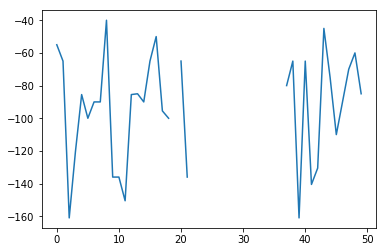

In [10]:
%matplotlib inline
plt.plot(range(iterations),rewards_list)

In [11]:
toy_system.n_states()

3600000

In [12]:
n_s = ((n+1)**k)
a = np.prod(n_discrete_load_levels)
b = np.prod(n_discrete_load_levels_trucks)
n_s = n_s *a *b
n_s

3600000

# Small system to apply Q-learning algorithm


In [13]:
def initialize_test_system():
    
    # Tanks' information
    global n
    n = 5 
    tank_ids = list(range(1,n+1))
    tank_max_loads =  np.array([100., 100., 200., 300., 400.])
    tank_current_loads =  np.array([50., 60., 120., 150., 300.])
    tank_consumption_rates =  np.array([10.] * n)
    
    global n_discrete_load_levels
    n_discrete_load_levels = np.array([2,2,2,2,2])

    # Trucks' information
    global k
    k = 2
    truck_ids = list(range(k))
    truck_max_loads = np.array([20., 50.])
    truck_current_loads = truck_max_loads.copy()
    truck_current_positions =  np.array([0] * k)
    #truck_fractions_deliverable =  np.array([1.] * k) # we for now we only allow to deliver all the content of the truck
    truck_fractions_deliverable =  np.array([ np.array([0.5, 1.]), 
                                              np.array([0.5, 1.])
                                            ]) # we for now we only allow to deliver all the content of the truck
    global n_discrete_load_levels_trucks
    n_discrete_load_levels_trucks = np.array([2,2])

    # System's information
    def simple_graph(n: int):    
        A = np.zeros((n,n))
        A[0,0:n] = 1
        A = A.astype(int)
        return(A)

    graph = simple_graph(n+1)
    tanks = [tank.Tank( tank_id, current_load, max_load, consumption_rate, n_lvls) 
             for  tank_id, current_load, max_load, consumption_rate, n_lvls in 
             zip( tank_ids, tank_current_loads, tank_max_loads, tank_consumption_rates, n_discrete_load_levels)]
    trucks = [truck.Truck( truck_id, current_load, max_load, current_position, load_fractions_deliverable, n_lvls) 
             for  truck_id, current_load, max_load, current_position, load_fractions_deliverable, n_lvls in 
             zip(truck_ids, truck_current_loads, truck_max_loads, truck_current_positions, 
                 truck_fractions_deliverable, n_discrete_load_levels_trucks)]

    def simple_weights(n: int, w: float):    
        W = np.full((n,n), np.inf)
        W[0,:] = w
        return(W)
    w =  np.array([0, 20., 10., 30., 50.5, 45.])

    weights_matrix = simple_weights(n+1, w)
    
    return(tanks, trucks, graph, weights_matrix)

tanks, trucks, graph, weights_matrix = initialize_test_system()
toy_system = model.System(tanks = tanks, trucks = trucks, adjacency_matrix = graph, weights_matrix = weights_matrix)

a_s_dim = toy_system.states_dim * toy_system.actions_dim
a_s_dim

46080

In [14]:
toy_system.discrete_state()



rewards = toy_system.random_action(seed);
rewards_list.append(rewards)
#prnt(toy_system.state())
print("Final rewards: ", rewards);
toy_system.reset_trucks_positions();

toy_system.da

self.trucks [<truck.Truck object at 0x7fac2bffaac8>, <truck.Truck object at 0x7fac2bffab00>]
Final rewards:  -110.0


[[1, 3], [0, 1]]

In [15]:
toy_system.ds

[[0, 0], [1, 1], [0, 1, 1, 0, 1]]

In [16]:
a = [[3, 4], [1, 1], [0, 0, 1, 0, 1]]
aa= ''.join(str(''.join(str(y) for y in x)) for x in a)

In [17]:
print(toy_system.ds)
print(toy_system.da)

[[0, 0], [1, 1], [0, 1, 1, 0, 1]]
[[1, 3], [0, 1]]


In [18]:
sa_new = toy_system.state_action_to_string()
sa_new

'0011011011301'

In [19]:
new_dict = {}
new_dict[sa_new] = {"qval": 1}

In [20]:
new_dict[sa_new]['qval']

1

## Off-policy algorithm (Train)

In [21]:
learning_rate0 = 0.05
learning_rate_decay = 0.1
n_iterations = 1000
discount_rate = 0.95

tanks, trucks, graph, weights_matrix = initialize_test_system()
toy_system = model.System(tanks = tanks, trucks = trucks, adjacency_matrix = graph, weights_matrix = weights_matrix)

Q = {}

def is_key(dic, key):
    if key in dic:
        return(True)
    else: return(False)

is_key(new_dict, sa_new)

state_length = 2*k + n

In [22]:
import pickle

def save_obj(obj, name ):
    with open('obj/'+ name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

def load_obj(name ):
    with open('obj/' + name + '.pkl', 'rb') as f:
        return pickle.load(f)

self.trucks [<truck.Truck object at 0x7fac2bfd25f8>, <truck.Truck object at 0x7fac2bfd2860>]
Iteration  0
s, a [[0, 0], [20.0, 50.0], [50.0, 60.0, 120.0, 150.0, 300.0]] [[3, 4], [10.0, 50.0]]
ds, da [[0, 0], [1, 1], [0, 1, 1, 0, 1]] [[3, 4], [0, 1]]
self.trucks [<truck.Truck object at 0x7fac2bfd25f8>, <truck.Truck object at 0x7fac2bfd2860>]
self.trucks [<truck.Truck object at 0x7fac2bfd25f8>, <truck.Truck object at 0x7fac2bfd2860>]
self.trucks [<truck.Truck object at 0x7fac2bfd25f8>, <truck.Truck object at 0x7fac2bfd2860>]
self.trucks [<truck.Truck object at 0x7fac2bfd25f8>, <truck.Truck object at 0x7fac2bfd2860>]
self.trucks [<truck.Truck object at 0x7fac2bfd25f8>, <truck.Truck object at 0x7fac2bfd2860>]
self.trucks [<truck.Truck object at 0x7fac2bfd25f8>, <truck.Truck object at 0x7fac2bfd2860>]
self.trucks [<truck.Truck object at 0x7fac2bfd25f8>, <truck.Truck object at 0x7fac2bfd2860>]
self.trucks [<truck.Truck object at 0x7fac2bfd25f8>, <truck.Truck object at 0x7fac2bfd2860>]
self.t

self.trucks [<truck.Truck object at 0x7fac2bfd25f8>, <truck.Truck object at 0x7fac2bfd2860>]
self.trucks [<truck.Truck object at 0x7fac2bfd25f8>, <truck.Truck object at 0x7fac2bfd2860>]
self.trucks [<truck.Truck object at 0x7fac2bfd25f8>, <truck.Truck object at 0x7fac2bfd2860>]
self.trucks [<truck.Truck object at 0x7fac2bfd25f8>, <truck.Truck object at 0x7fac2bfd2860>]
self.trucks [<truck.Truck object at 0x7fac2bfd25f8>, <truck.Truck object at 0x7fac2bfd2860>]
self.trucks [<truck.Truck object at 0x7fac2bfd25f8>, <truck.Truck object at 0x7fac2bfd2860>]
self.trucks [<truck.Truck object at 0x7fac2bfd25f8>, <truck.Truck object at 0x7fac2bfd2860>]
self.trucks [<truck.Truck object at 0x7fac2bfd25f8>, <truck.Truck object at 0x7fac2bfd2860>]
self.trucks [<truck.Truck object at 0x7fac2bfd25f8>, <truck.Truck object at 0x7fac2bfd2860>]
Iteration  100
s, a [[0, 0], [20.0, 50.0], [40.0, 50.0, 60.0, 190.0, 335.0]] [[4, 2], [20.0, 50.0]]
ds, da [[0, 0], [1, 1], [0, 0, 0, 1, 1]] [[4, 2], [1, 1]]
self.

self.trucks [<truck.Truck object at 0x7fac2bfd25f8>, <truck.Truck object at 0x7fac2bfd2860>]
self.trucks [<truck.Truck object at 0x7fac2bfd25f8>, <truck.Truck object at 0x7fac2bfd2860>]
self.trucks [<truck.Truck object at 0x7fac2bfd25f8>, <truck.Truck object at 0x7fac2bfd2860>]
self.trucks [<truck.Truck object at 0x7fac2bfd25f8>, <truck.Truck object at 0x7fac2bfd2860>]
self.trucks [<truck.Truck object at 0x7fac2bfd25f8>, <truck.Truck object at 0x7fac2bfd2860>]
self.trucks [<truck.Truck object at 0x7fac2bfd25f8>, <truck.Truck object at 0x7fac2bfd2860>]
self.trucks [<truck.Truck object at 0x7fac2bfd25f8>, <truck.Truck object at 0x7fac2bfd2860>]
self.trucks [<truck.Truck object at 0x7fac2bfd25f8>, <truck.Truck object at 0x7fac2bfd2860>]
self.trucks [<truck.Truck object at 0x7fac2bfd25f8>, <truck.Truck object at 0x7fac2bfd2860>]
self.trucks [<truck.Truck object at 0x7fac2bfd25f8>, <truck.Truck object at 0x7fac2bfd2860>]
self.trucks [<truck.Truck object at 0x7fac2bfd25f8>, <truck.Truck obje

self.trucks [<truck.Truck object at 0x7fac2bfd25f8>, <truck.Truck object at 0x7fac2bfd2860>]
self.trucks [<truck.Truck object at 0x7fac2bfd25f8>, <truck.Truck object at 0x7fac2bfd2860>]
self.trucks [<truck.Truck object at 0x7fac2bfd25f8>, <truck.Truck object at 0x7fac2bfd2860>]
self.trucks [<truck.Truck object at 0x7fac2bfd25f8>, <truck.Truck object at 0x7fac2bfd2860>]
self.trucks [<truck.Truck object at 0x7fac2bfd25f8>, <truck.Truck object at 0x7fac2bfd2860>]
self.trucks [<truck.Truck object at 0x7fac2bfd25f8>, <truck.Truck object at 0x7fac2bfd2860>]
self.trucks [<truck.Truck object at 0x7fac2bfd25f8>, <truck.Truck object at 0x7fac2bfd2860>]
self.trucks [<truck.Truck object at 0x7fac2bfd25f8>, <truck.Truck object at 0x7fac2bfd2860>]
self.trucks [<truck.Truck object at 0x7fac2bfd25f8>, <truck.Truck object at 0x7fac2bfd2860>]
self.trucks [<truck.Truck object at 0x7fac2bfd25f8>, <truck.Truck object at 0x7fac2bfd2860>]
self.trucks [<truck.Truck object at 0x7fac2bfd25f8>, <truck.Truck obje

self.trucks [<truck.Truck object at 0x7fac2bfd25f8>, <truck.Truck object at 0x7fac2bfd2860>]
self.trucks [<truck.Truck object at 0x7fac2bfd25f8>, <truck.Truck object at 0x7fac2bfd2860>]
self.trucks [<truck.Truck object at 0x7fac2bfd25f8>, <truck.Truck object at 0x7fac2bfd2860>]
self.trucks [<truck.Truck object at 0x7fac2bfd25f8>, <truck.Truck object at 0x7fac2bfd2860>]
self.trucks [<truck.Truck object at 0x7fac2bfd25f8>, <truck.Truck object at 0x7fac2bfd2860>]
self.trucks [<truck.Truck object at 0x7fac2bfd25f8>, <truck.Truck object at 0x7fac2bfd2860>]
self.trucks [<truck.Truck object at 0x7fac2bfd25f8>, <truck.Truck object at 0x7fac2bfd2860>]
self.trucks [<truck.Truck object at 0x7fac2bfd25f8>, <truck.Truck object at 0x7fac2bfd2860>]
self.trucks [<truck.Truck object at 0x7fac2bfd25f8>, <truck.Truck object at 0x7fac2bfd2860>]
self.trucks [<truck.Truck object at 0x7fac2bfd25f8>, <truck.Truck object at 0x7fac2bfd2860>]
self.trucks [<truck.Truck object at 0x7fac2bfd25f8>, <truck.Truck obje

self.trucks [<truck.Truck object at 0x7fac2bfd25f8>, <truck.Truck object at 0x7fac2bfd2860>]
self.trucks [<truck.Truck object at 0x7fac2bfd25f8>, <truck.Truck object at 0x7fac2bfd2860>]
self.trucks [<truck.Truck object at 0x7fac2bfd25f8>, <truck.Truck object at 0x7fac2bfd2860>]
self.trucks [<truck.Truck object at 0x7fac2bfd25f8>, <truck.Truck object at 0x7fac2bfd2860>]
self.trucks [<truck.Truck object at 0x7fac2bfd25f8>, <truck.Truck object at 0x7fac2bfd2860>]
self.trucks [<truck.Truck object at 0x7fac2bfd25f8>, <truck.Truck object at 0x7fac2bfd2860>]
self.trucks [<truck.Truck object at 0x7fac2bfd25f8>, <truck.Truck object at 0x7fac2bfd2860>]
self.trucks [<truck.Truck object at 0x7fac2bfd25f8>, <truck.Truck object at 0x7fac2bfd2860>]
self.trucks [<truck.Truck object at 0x7fac2bfd25f8>, <truck.Truck object at 0x7fac2bfd2860>]
self.trucks [<truck.Truck object at 0x7fac2bfd25f8>, <truck.Truck object at 0x7fac2bfd2860>]
self.trucks [<truck.Truck object at 0x7fac2bfd25f8>, <truck.Truck obje

self.trucks [<truck.Truck object at 0x7fac2bfd25f8>, <truck.Truck object at 0x7fac2bfd2860>]
self.trucks [<truck.Truck object at 0x7fac2bfd25f8>, <truck.Truck object at 0x7fac2bfd2860>]
self.trucks [<truck.Truck object at 0x7fac2bfd25f8>, <truck.Truck object at 0x7fac2bfd2860>]
self.trucks [<truck.Truck object at 0x7fac2bfd25f8>, <truck.Truck object at 0x7fac2bfd2860>]
self.trucks [<truck.Truck object at 0x7fac2bfd25f8>, <truck.Truck object at 0x7fac2bfd2860>]
self.trucks [<truck.Truck object at 0x7fac2bfd25f8>, <truck.Truck object at 0x7fac2bfd2860>]
self.trucks [<truck.Truck object at 0x7fac2bfd25f8>, <truck.Truck object at 0x7fac2bfd2860>]
self.trucks [<truck.Truck object at 0x7fac2bfd25f8>, <truck.Truck object at 0x7fac2bfd2860>]
self.trucks [<truck.Truck object at 0x7fac2bfd25f8>, <truck.Truck object at 0x7fac2bfd2860>]
self.trucks [<truck.Truck object at 0x7fac2bfd25f8>, <truck.Truck object at 0x7fac2bfd2860>]
self.trucks [<truck.Truck object at 0x7fac2bfd25f8>, <truck.Truck obje

self.trucks [<truck.Truck object at 0x7fac2bfd25f8>, <truck.Truck object at 0x7fac2bfd2860>]
self.trucks [<truck.Truck object at 0x7fac2bfd25f8>, <truck.Truck object at 0x7fac2bfd2860>]
self.trucks [<truck.Truck object at 0x7fac2bfd25f8>, <truck.Truck object at 0x7fac2bfd2860>]
self.trucks [<truck.Truck object at 0x7fac2bfd25f8>, <truck.Truck object at 0x7fac2bfd2860>]
self.trucks [<truck.Truck object at 0x7fac2bfd25f8>, <truck.Truck object at 0x7fac2bfd2860>]
self.trucks [<truck.Truck object at 0x7fac2bfd25f8>, <truck.Truck object at 0x7fac2bfd2860>]
self.trucks [<truck.Truck object at 0x7fac2bfd25f8>, <truck.Truck object at 0x7fac2bfd2860>]
self.trucks [<truck.Truck object at 0x7fac2bfd25f8>, <truck.Truck object at 0x7fac2bfd2860>]
self.trucks [<truck.Truck object at 0x7fac2bfd25f8>, <truck.Truck object at 0x7fac2bfd2860>]
self.trucks [<truck.Truck object at 0x7fac2bfd25f8>, <truck.Truck object at 0x7fac2bfd2860>]
self.trucks [<truck.Truck object at 0x7fac2bfd25f8>, <truck.Truck obje

self.trucks [<truck.Truck object at 0x7fac2bfd25f8>, <truck.Truck object at 0x7fac2bfd2860>]
self.trucks [<truck.Truck object at 0x7fac2bfd25f8>, <truck.Truck object at 0x7fac2bfd2860>]
self.trucks [<truck.Truck object at 0x7fac2bfd25f8>, <truck.Truck object at 0x7fac2bfd2860>]
self.trucks [<truck.Truck object at 0x7fac2bfd25f8>, <truck.Truck object at 0x7fac2bfd2860>]
self.trucks [<truck.Truck object at 0x7fac2bfd25f8>, <truck.Truck object at 0x7fac2bfd2860>]
self.trucks [<truck.Truck object at 0x7fac2bfd25f8>, <truck.Truck object at 0x7fac2bfd2860>]
self.trucks [<truck.Truck object at 0x7fac2bfd25f8>, <truck.Truck object at 0x7fac2bfd2860>]
self.trucks [<truck.Truck object at 0x7fac2bfd25f8>, <truck.Truck object at 0x7fac2bfd2860>]
self.trucks [<truck.Truck object at 0x7fac2bfd25f8>, <truck.Truck object at 0x7fac2bfd2860>]
self.trucks [<truck.Truck object at 0x7fac2bfd25f8>, <truck.Truck object at 0x7fac2bfd2860>]
self.trucks [<truck.Truck object at 0x7fac2bfd25f8>, <truck.Truck obje

self.trucks [<truck.Truck object at 0x7fac2bfd25f8>, <truck.Truck object at 0x7fac2bfd2860>]
self.trucks [<truck.Truck object at 0x7fac2bfd25f8>, <truck.Truck object at 0x7fac2bfd2860>]
self.trucks [<truck.Truck object at 0x7fac2bfd25f8>, <truck.Truck object at 0x7fac2bfd2860>]
Iteration  800
s, a [[0, 0], [20.0, 50.0], [5.0, 45.0, 160.0, 95.0, 215.0]] [[0, 2], [10.0, 25.0]]
ds, da [[0, 0], [1, 1], [0, 0, 1, 0, 1]] [[0, 2], [0, 0]]
self.trucks [<truck.Truck object at 0x7fac2bfd25f8>, <truck.Truck object at 0x7fac2bfd2860>]
self.trucks [<truck.Truck object at 0x7fac2bfd25f8>, <truck.Truck object at 0x7fac2bfd2860>]
self.trucks [<truck.Truck object at 0x7fac2bfd25f8>, <truck.Truck object at 0x7fac2bfd2860>]
self.trucks [<truck.Truck object at 0x7fac2bfd25f8>, <truck.Truck object at 0x7fac2bfd2860>]
self.trucks [<truck.Truck object at 0x7fac2bfd25f8>, <truck.Truck object at 0x7fac2bfd2860>]
self.trucks [<truck.Truck object at 0x7fac2bfd25f8>, <truck.Truck object at 0x7fac2bfd2860>]
self.t

self.trucks [<truck.Truck object at 0x7fac2bfd25f8>, <truck.Truck object at 0x7fac2bfd2860>]
self.trucks [<truck.Truck object at 0x7fac2bfd25f8>, <truck.Truck object at 0x7fac2bfd2860>]
self.trucks [<truck.Truck object at 0x7fac2bfd25f8>, <truck.Truck object at 0x7fac2bfd2860>]
self.trucks [<truck.Truck object at 0x7fac2bfd25f8>, <truck.Truck object at 0x7fac2bfd2860>]
self.trucks [<truck.Truck object at 0x7fac2bfd25f8>, <truck.Truck object at 0x7fac2bfd2860>]
self.trucks [<truck.Truck object at 0x7fac2bfd25f8>, <truck.Truck object at 0x7fac2bfd2860>]
self.trucks [<truck.Truck object at 0x7fac2bfd25f8>, <truck.Truck object at 0x7fac2bfd2860>]
self.trucks [<truck.Truck object at 0x7fac2bfd25f8>, <truck.Truck object at 0x7fac2bfd2860>]
self.trucks [<truck.Truck object at 0x7fac2bfd25f8>, <truck.Truck object at 0x7fac2bfd2860>]
self.trucks [<truck.Truck object at 0x7fac2bfd25f8>, <truck.Truck object at 0x7fac2bfd2860>]
self.trucks [<truck.Truck object at 0x7fac2bfd25f8>, <truck.Truck obje

self.trucks [<truck.Truck object at 0x7fac2bfd25f8>, <truck.Truck object at 0x7fac2bfd2860>]
self.trucks [<truck.Truck object at 0x7fac2bfd25f8>, <truck.Truck object at 0x7fac2bfd2860>]
self.trucks [<truck.Truck object at 0x7fac2bfd25f8>, <truck.Truck object at 0x7fac2bfd2860>]
self.trucks [<truck.Truck object at 0x7fac2bfd25f8>, <truck.Truck object at 0x7fac2bfd2860>]
self.trucks [<truck.Truck object at 0x7fac2bfd25f8>, <truck.Truck object at 0x7fac2bfd2860>]
self.trucks [<truck.Truck object at 0x7fac2bfd25f8>, <truck.Truck object at 0x7fac2bfd2860>]
self.trucks [<truck.Truck object at 0x7fac2bfd25f8>, <truck.Truck object at 0x7fac2bfd2860>]
self.trucks [<truck.Truck object at 0x7fac2bfd25f8>, <truck.Truck object at 0x7fac2bfd2860>]
self.trucks [<truck.Truck object at 0x7fac2bfd25f8>, <truck.Truck object at 0x7fac2bfd2860>]
self.trucks [<truck.Truck object at 0x7fac2bfd25f8>, <truck.Truck object at 0x7fac2bfd2860>]
self.trucks [<truck.Truck object at 0x7fac2bfd25f8>, <truck.Truck obje

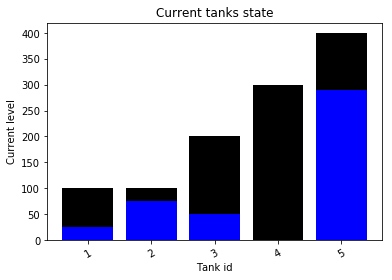

In [23]:
# "Train zone". Q-values are being converging to the optimal, theoretically
train = True
if train:

    visualization_steps = []
    rewards_list = []

    verbose = False
    verbose_info = True

    for iteration in range(n_iterations):
        toy_system.update_state() 

        if verbose: print("System state before, ", toy_system.ds)

        reward = toy_system.random_action()
        sa_current = toy_system.state_action_to_string()

        if is_key(Q, sa_current) == False:
            Q[sa_current] = 0

        learning_rate = learning_rate0 / (1+iteration*learning_rate_decay)

        Q_max = max([Q[key] for key in Q.keys() if key.startswith(sa_current[0:state_length])])

        Q[sa_current] = ( (1-learning_rate) * Q[sa_current] 
                         + learning_rate* (reward + discount_rate * Q_max)
                        )
        if verbose:
            print("System state after, ", toy_system.ds)
            print("System action after, ", toy_system.da)
            print("sa current, ", sa_current)

        toy_system.reset_trucks_positions();
        toy_system.reset_trucks_loads();

        #Save visualization and rewards
        rewards_list.append(rewards);
        visualization_steps.append(toy_system.visualize());

        if iteration % 100 == 0:
            print("Iteration ", iteration)
            if verbose_info:
                print("s, a", toy_system.s, toy_system.a)
                print("ds, da", toy_system.ds, toy_system.da)

            save_obj(Q, "Q-dict-test-" + f"{iteration}")   
            save_obj(visualization_steps, "vis/vis-train-test-" + f"{iteration}")   
            save_obj(rewards_list, "rewards/rew-train-test-" + f"{iteration}")   




    save_obj(Q, "Q-dict-test-" + f"{iteration}")   
    save_obj(visualization_steps, "vis-train-test-" + f"{iteration}")   
    save_obj(rewards_list, "rew-train-test-" + f"{iteration}")   


In [24]:
# Optimal policy using the Q values trained previously:
# Q = load_obj("Q-dict-test-"+f'{n_iterations-1}')
# #print(Q.keys())

# rewards_l = load_obj('rewards/rew-train-test'+f'{n_iterations}')
# vis_l = load_obj('vis/vis-train-test-'+f'{n_iterations}')

# anim = create_system_animation(vis_l, n_iterations)
# HTML(anim.to_html5_video())

In [25]:


new_keys = new_dict.keys()

In [26]:
#[Q[key] for key in new_keys if key.startswith(sa_new[0:2])]

In [27]:
toy_system.ds

[[0, 0], [1, 1], [0, 1, 0, 0, 1]]

In [28]:
toy_system.da

[[2, 1], [0, 0]]

In [29]:
max([1,2,3])

3

In [30]:
[1,2,3][0:3]

[1, 2, 3]

In [31]:
#Q['3311-1-1']

In [32]:
test_toy_system = model.System(tanks = tanks, trucks = trucks, adjacency_matrix = graph, weights_matrix = weights_matrix)


### To do

1. Función que permita aplicar una acción al sistema usando el código de números enteros (como en las keys de los dicts)

2. Hacer una simulación que vaya aplicando, en cada estado, la accion con mayor Q-value en el diccionario Q.

3. Visualizar como evoluciona el sistema con la optimal policy estimada con alguna random

In [33]:
test_toy_system.n

5

In [34]:
a = '1234'

In [35]:
for element in a: 
    print(element)

1
2
3
4


In [36]:
a[0:2]

'12'

### Testing deterministic_action function from System class

In [37]:
tanks, trucks, graph, weights_matrix = initialize_test_system()
test_toy_system = model.System(tanks = tanks, trucks = trucks, adjacency_matrix = graph, weights_matrix = weights_matrix)
test_toy_system.ds

[[0, 0], [1, 1], [0, 1, 1, 0, 1]]

In [38]:
# Test example:
# System state before,  [[0, 0], [1, 1], [0, 0, 1, 0, 1]]
# System state after,  [[0, 0], [1, 1], [0, 0, 1, 0, 1]]
# System action after,  [[3, 0], [0, 1]]
# sa current,  0011001013001

s0 = '001100101'
a0 = '3001'

In [39]:
int('1')

1

In [40]:
test_toy_system.set_discrete_state(s0)
test_toy_system.ds

[[0, 0], [1, 1], [0, 0, 1, 0, 1]]

In [41]:
test_toy_system.deterministic_action(a0)

-55.0

In [42]:
toy_system.update_state() 


In [43]:
test_toy_system.da

[[3, 0], [0, 1]]

In [44]:

test_toy_system.ds

[[0, 0], [1, 1], [0, 0, 1, 0, 1]]

In [45]:
200000/3600

55.55555555555556

### Visualize simulation of 900 train steps

In [46]:
verbose_vis = False

if verbose_vis:

    n_iterations = 900

    Q = load_obj("Q-dict-test-"+f'{n_iterations}')
    #print(Q.keys())

    rewards_l = load_obj('rewards/rew-train-test-'+f'{n_iterations}')
    vis_l = load_obj('vis/vis-train-test-'+f'{n_iterations}')

    anim = create_system_animation(vis_l, n_iterations)
    HTML(anim.to_html5_video())

In [47]:
#each 9 frames
if verbose_vis:
    anim = create_system_animation(vis_l, n_iterations, 9)
    HTML(anim.to_html5_video())

## Off-policy algorithm (Optimal policy from the trained Q-values)

In [48]:
# Initialize system
tanks, trucks, graph, weights_matrix = initialize_test_system()

# Load trained Q-values
n_iterations = 900
Q = load_obj("Q-dict-test-"+f'{n_iterations}')

test_toy_system = model.System(tanks = tanks, trucks = trucks, adjacency_matrix = graph, weights_matrix = weights_matrix)
a0 = '3001'
s0 = test_toy_system.state_to_string()
print(s0)
test_toy_system.deterministic_action(a0)

print(test_toy_system.ds)
print(test_toy_system.state_to_string())
print(test_toy_system.da)
print(test_toy_system.action_to_string())

print(test_toy_system.state_action_to_string())

001101101
[[0, 0], [1, 1], [0, 1, 1, 0, 1]]
001101101
[[3, 0], [0, 1]]
3001
0011011013001


In [49]:
# Way to access to the keys of the dictionary Q
key_index = 0
i = list(Q)[key_index]
#Q value:
Q[i]

-7.0250000000000004

In [50]:
s0_keys = [key for key in list(Q) if key.startswith(s0)][1:10]
s0_keys

['0011011011001',
 '0011011010113',
 '0011011011011',
 '0011011012000',
 '0011011010401',
 '0011011010211',
 '0011011012010']

In [51]:
s0_q = [Q[s0_key] for s0_key in s0_keys]
print(s0_q)
print(s0_q == max(s0_q))
optimal_key_index = np.where(np.isin(s0_q, max(s0_q)))[0][0]
optimal_key = s0_keys[optimal_key_index]
print(optimal_key)

optimal_action = optimal_key[toy_system.state_length:]


[-0.31746031746031744, -0.15748031496062992, -0.3515625, -0.084269662921348312, -0.067791411042944782, -0.049019607843137254, -0.033659730722154224]
[False False False False False False  True]
0011011012010


In [66]:
# Given a state, returns the action that has the highest Q-value.

def optimal_policy(state, Q):
    """
    state must be in the string-integers code
    """
    state_keys = [key for key in list(Q) if key.startswith(s0)][1:10]
    state_q = [Q[state_key] for state_key in state_keys]
    
    optimal_key_index = np.where(np.isin(state_q, max(state_q)))[0][0]
    optimal_key = state_keys[optimal_key_index]
    
    optimal_action = optimal_key[toy_system.state_length:]
    
    return(optimal_action)
    

In [67]:
optimal_policy(s0, Q)

'2110'

### Test optimal policy with a small simulation

In [83]:
# Initialize system
tanks, trucks, graph, weights_matrix = initialize_test_system()

# Load trained Q-values
n_iterations = 900
Q = load_obj("Q-dict-test-"+f'{n_iterations}')

sim_iterations = 10
test_toy_system = model.System(tanks = tanks, trucks = trucks, adjacency_matrix = graph, weights_matrix = weights_matrix)

-20.0
-10.0
-10.0
-10.0
-10.0
-inf
-inf
-inf
-inf
-inf


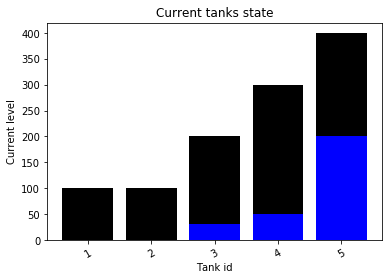

In [84]:
test = True
visualization_steps = []
rewards_list = []


if test:
    for i in range(sim_iterations):
        test_toy_system.update_state() 
        
        s0 = test_toy_system.state_to_string()
        best_action = optimal_policy(s0, Q)
        
        reward = test_toy_system.deterministic_action(best_action)
        print(reward)
        
        test_toy_system.reset_trucks_positions();
        test_toy_system.reset_trucks_loads();

        
        
        #Save visualization and rewards
        rewards_list.append(reward);
        visualization_steps.append(test_toy_system.visualize());


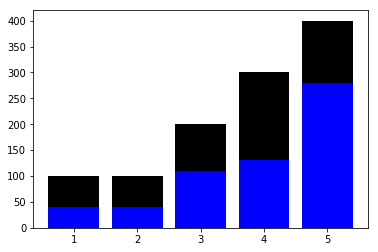

In [78]:


rewards_l = rewards_list
vis_l = visualization_steps

anim = create_system_animation(vis_l, sim_iterations)
HTML(anim.to_html5_video())

In [73]:
max(-np.inf,-10)

-10

In [86]:
Q


{'0011000000101': -0.080971659919028341,
 '0011000001000': -0.056122448979591844,
 '0011000001310': -0.15728476821192053,
 '0011000003000': -inf,
 '0011000003311': -0.092592592592592601,
 '0011000004101': -inf,
 '0011000004110': -0.11713995943204868,
 '0011000004300': -inf,
 '0011000010001': -0.17857142857142855,
 '0011000010200': -0.12569832402234635,
 '0011000011000': -inf,
 '0011000011301': -inf,
 '0011000012410': -inf,
 '0011000013000': -inf,
 '0011000013210': -0.24011299435028252,
 '0011000013211': -inf,
 '0011000013413': -0.30271084337349397,
 '0011000014311': -inf,
 '0011000014410': -0.4101123595505618,
 '0011000014413': -0.36227544910179638,
 '0011000100010': -inf,
 '0011000100110': -0.067567567567567571,
 '0011000100301': -0.13931888544891644,
 '0011000100410': -inf,
 '0011000101001': -inf,
 '0011000101010': -inf,
 '0011000101011': -0.13157894736842105,
 '0011000101100': -0.103518326417704,
 '0011000101101': -inf,
 '0011000101110': -inf,
 '0011000101211': -0.15015015015015015,